# Project: Building Basic predictive models over the NYC Taxi Trip dataset

# 1. Choose Evaluation Metrics : Mean Absolute error (MAE)

In MAE the score is measure as the average of the absoulte error values.In MAE different error are not weighted more or less, but the score increase lineraly with the increase in errors. In this project our target variable is trip duration which varies largely so we we will be able to detect the smaller errors using MAE as its formula comorise of square root difference of prdicted and actual value. 

# 2. Building benchmark model

In [1]:
#Import required libraries
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Read the data set using pandas
data = pd.read_csv(r'C:\Users\bhawna bhatti\Downloads\nyc_taxi_trip_duration.csv')

In [3]:
# Read first 5 lines
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848


In [4]:
# check shape: Rows and columns
data.shape

(729322, 11)

In [5]:
#data types of variables
data.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

In [6]:
# look for missing values
data.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

In [7]:
# convert dtype of pickup and dropoff to datetime
data['pickup_datetime'] = pd.to_datetime(data['pickup_datetime'])
data['dropoff_datetime'] = pd.to_datetime(data['dropoff_datetime'])

In [8]:
 #extract day of week and hour of day from pickup time
import datetime as dt
data['day_of_week'] = data['pickup_datetime'].dt.weekday
data['hour_of_day'] = data['pickup_datetime'].dt.hour

In [9]:
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,day_of_week,hour_of_day
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400,0,16
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100,4,23
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635,6,17
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141,1,9
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848,2,6


Shuffling and dividing dataset into train and test dataset

In [10]:
#import sklearn to perform this task
from sklearn.utils import shuffle

#divide the data into 4 parts : 3 parts tran and 1 part test data 
data = shuffle(data, random_state =42)
div= int(data.shape[0]/4)
train = data.loc[:3*div+1,:]
test = data.loc[3*div+1:]

In [11]:
train.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,day_of_week,hour_of_day
469114,id2380741,2,2016-05-21 10:40:14,2016-05-21 10:51:11,1,-73.981796,40.762035,-73.972267,40.781265,N,657,5,10
694852,id3946961,2,2016-01-08 18:49:27,2016-01-08 18:52:42,5,-73.980965,40.747677,-73.982704,40.741161,N,195,4,18
696324,id0833913,1,2016-05-22 00:54:10,2016-05-22 01:08:10,1,-73.951065,40.782722,-73.867691,40.833664,N,840,6,0
356496,id1336849,1,2016-06-11 10:32:12,2016-06-11 10:38:50,1,-73.987625,40.762791,-73.973518,40.762909,N,398,5,10
645318,id1610858,1,2016-04-03 10:45:51,2016-04-03 10:57:13,3,-73.964333,40.792503,-73.988609,40.758369,N,682,6,10


In [12]:
test.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,day_of_week,hour_of_day
546991,id2240736,1,2016-05-25 07:59:16,2016-05-25 08:05:02,1,-73.991364,40.732590,-74.000526,40.742283,N,346,2,7
43126,id1423404,1,2016-01-18 12:17:13,2016-01-18 12:21:13,2,-73.966225,40.768059,-73.967606,40.763073,N,240,0,12
641450,id1317268,2,2016-03-02 18:39:01,2016-03-02 18:50:12,1,-73.994926,40.766018,-74.004219,40.742523,N,671,2,18
611380,id3335546,1,2016-04-06 19:17:20,2016-04-06 19:18:03,1,-73.974388,40.793781,-73.976006,40.792339,N,43,2,19
62690,id2174190,2,2016-06-21 18:35:31,2016-06-21 18:40:56,3,-73.963440,40.798557,-73.979736,40.777878,N,325,1,18


In [13]:
#mean of target which is trip duration and storing it as a simple_mean
test['simple_mean'] = train['trip_duration'].mean()

In [14]:
test['simple_mean']

546991    951.586402
43126     951.586402
641450    951.586402
611380    951.586402
62690     951.586402
             ...    
259178    951.586402
365838    951.586402
131932    951.586402
671155    951.586402
121958    951.586402
Name: simple_mean, Length: 139872, dtype: float64

In [15]:
#importing mean absolute error metrics
from sklearn.metrics import mean_absolute_error as MAE

In [16]:
#Calculating mean absolute error
simple_mean_error = MAE(test['trip_duration'], test['simple_mean'])

In [17]:
simple_mean_error

621.9954570969938

In [18]:
#creating pivot table for day of week and its trip duration
day_of_week = pd.pivot_table(train, values = 'trip_duration', index = ['day_of_week'], aggfunc=np.mean)
day_of_week

,trip_duration
day_of_week,
0,890.012810
1,984.251885
2,973.047004
3,1005.146720
4,989.699815
5,918.067036
6,888.431043


In [19]:
#iterate through each day of week and calcualte mean for each day
test['day_of_week_mean'] = 0

for i in train['day_of_week'].unique():
    test['day_of_week_mean'][test['day_of_week']== i] = train['trip_duration'][train['day_of_week']== i].mean()

In [20]:
#calculating mean absolute error
day_of_week_error = MAE(test['trip_duration'],test['day_of_week_mean'])
day_of_week_error

620.6622607467708

In [21]:
#Mean absolute error : pickup_time (hour of day)¶

In [22]:
#creating pivot table for hour of day and its trip duration
hour_of_day = pd.pivot_table(train, values = 'trip_duration', index = ['hour_of_day'], aggfunc=np.mean)
hour_of_day

,trip_duration
hour_of_day,
0,982.268516
1,915.598624
2,853.385638
3,886.535977
4,890.512498
5,829.845634
6,726.336661
7,812.179002
8,937.732130


In [23]:
#iterate through each hour of day and calcualte mean for each day
test['hour_of_day_mean'] = 0

for i in train['hour_of_day'].unique():
    test['hour_of_day_mean'][test['hour_of_day']== i] = train['trip_duration'][train['hour_of_day']== i].mean()

In [24]:
# calculate MAE w.r.t hour of day
hour_of_day_error = MAE(test['trip_duration'],test['hour_of_day_mean'])
hour_of_day_error

620.3242746375885

In [25]:
#Mean absolute error : vendor_id

In [26]:
#creating pivot table for day of week and its trip duration
vendor = pd.pivot_table(train, values = 'trip_duration', index = ['vendor_id'], aggfunc= np.mean)
vendor 

,trip_duration
vendor_id,
1,838.174354
2,1049.946134


In [27]:
#iterate through each day of week and calcualte mean for each day
test['vendor_id_mean'] = 0

for i in train['vendor_id'].unique():
    test['vendor_id_mean'][test['vendor_id']== i] = train['trip_duration'][train['vendor_id']== i].mean()

In [28]:
#calculate MAE for vendor id
vendor_id_error = MAE(test['trip_duration'],test['vendor_id_mean'])
vendor_id_error

627.1274504364544

In [29]:
#mean trip duration w.r.t passenger count
#creating pivot table for day of week and its trip duration
passenger = pd.pivot_table(train, values = 'trip_duration', index = ['passenger_count'], aggfunc= np.mean)
passenger 

,trip_duration
passenger_count,
0,334.733333
1,919.236280
2,1000.159939
3,1034.393923
4,1028.731304
5,1078.708147
6,1080.694100


In [30]:
#iterate through each day of week and calcualte mean for each day
test['passenger_count_mean'] = 0

for i in train['passenger_count'].unique():
    test['passenger_count_mean'][test['passenger_count']== i] = train['trip_duration'][train['passenger_count']== i].mean()

In [31]:
passenger_count_error = MAE(test['trip_duration'],test['passenger_count_mean'])
passenger_count_error

622.5222915139927

In [32]:
#Mean absolute error : day of week and hour of day together

In [33]:
#creating pivot table for day of week , hour of day and corresponding trip duration
combo = pd.pivot_table(train, values = 'trip_duration', index = ['day_of_week','hour_of_day'], aggfunc = np.mean)
combo

trip_duration
day_of_week hour_of_day               
0           0               857.864624
            1               848.960695
            2               799.703533
            3               748.451485
            4               890.000000
...                                ...
6           19              902.853529
            20              864.932558
            21              809.904430
            22              897.251946
            23              795.720992

[168 rows x 1 columns]

In [34]:
#iterate through each day of week and then hour of day to calcualte mean
test['mean_combo'] = 0

a1 = 'day_of_week'
a2 = 'hour_of_day'

for i in test[a1].unique():
    for j in test[a2].unique():
        test['mean_combo'][(test[a1] ==i) & (test[a2] == j)] = train['trip_duration'][(train[a1]==i) & (train[a2]==(j))].mean()

In [35]:
#calculating mean absolute error w.r.t to day of week and hour of day
mean_combo_error = MAE(test['trip_duration'] , test['mean_combo'] )
mean_combo_error

619.2490529563537

By building basic pedictive model we get the lowest mean error by using two variables day of week and hour of day w.r.t trip duration.

# 3. Build KNN model

In [36]:
#Import required libraries
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [37]:
#Read the data set using pandas 
#As data set is large the models are taking too much time to run so we will we will take part of data set out of the main data.
data = pd.read_csv(r'C:\Users\bhawna bhatti\Downloads\nyc_taxi_trip_duration.csv',nrows=50000)

In [38]:
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848


In [39]:
data.shape

(50000, 11)

In [40]:
data.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

In [41]:
# convert dtype of pickup and dropoff to datetime
data['pickup_datetime'] = pd.to_datetime(data['pickup_datetime'])
data['dropoff_datetime'] = pd.to_datetime(data['dropoff_datetime'])

In [42]:
#extract day of week and hour of day from pickup time
import datetime as dt
data['day_of_week'] = data['pickup_datetime'].dt.weekday
data['hour_of_day'] = data['pickup_datetime'].dt.hour

In [43]:
#dtype of vendor_id to category as we need to create 0 and 1 value for it later
data['vendor_id'] = data['vendor_id'].astype('category')

Outlier detection and removal

<AxesSubplot:>

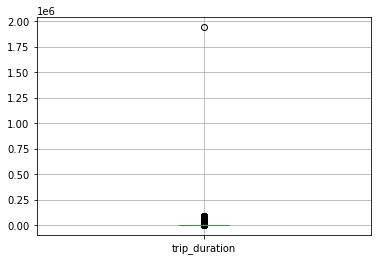

In [44]:
#boxplot to look for ouliers
data.boxplot(column = ['trip_duration'])

In [45]:
#taking the log value as value of the target varibale spans a large range. 
data['log_trip_duration'] = np.log(data['trip_duration'].values + 1)
data['log_trip_duration'] = data['log_trip_duration'].astype('float16')

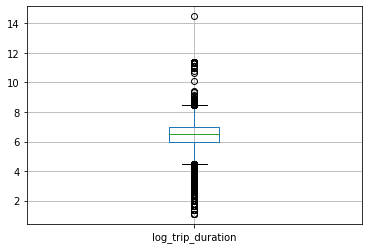

In [46]:
data.boxplot(column = ['log_trip_duration'])
plt.show()

In the above box plot we can see the values in the wisker region which are ouliers so we will remove them.

In [47]:
#removing the ouliers
data = data.loc[(data.log_trip_duration > 4.59) & (data.log_trip_duration < 8.25)]

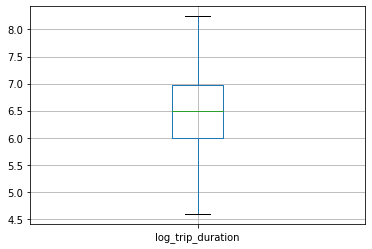

In [48]:
# plot after removing outliers
data.boxplot(column = ['log_trip_duration'])
plt.show()

In [49]:
data.dtypes

id                            object
vendor_id                   category
pickup_datetime       datetime64[ns]
dropoff_datetime      datetime64[ns]
passenger_count                int64
pickup_longitude             float64
pickup_latitude              float64
dropoff_longitude            float64
dropoff_latitude             float64
store_and_fwd_flag            object
trip_duration                  int64
day_of_week                    int64
hour_of_day                    int64
log_trip_duration            float16
dtype: object

In [50]:
#we will drop the colums which we don't require and give 0 1 value to categorical dtypes
data=pd.get_dummies(data.drop(['trip_duration','pickup_datetime', 'dropoff_datetime', 'id'], axis = 1))

In [51]:
data.head()

,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,day_of_week,hour_of_day,log_trip_duration,vendor_id_1,vendor_id_2,store_and_fwd_flag_N,store_and_fwd_flag_Y
0,1,-73.953918,40.778873,-73.963875,40.771164,0,16,5.992188,0,1,1,0
1,2,-73.988312,40.731743,-73.994751,40.694931,4,23,7.003906,1,0,1,0
2,2,-73.997314,40.721458,-73.948029,40.774918,6,17,7.398438,0,1,1,0
3,6,-73.961670,40.759720,-73.956779,40.780628,1,9,7.039062,0,1,1,0
4,1,-74.017120,40.708469,-73.988182,40.740631,2,6,6.742188,1,0,1,0


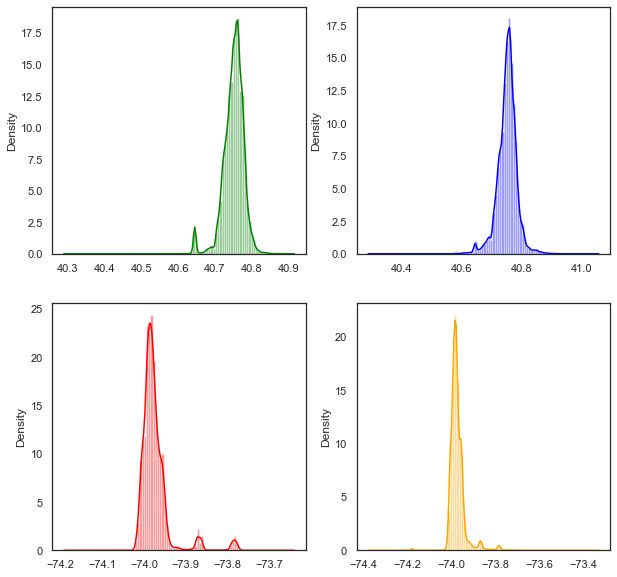

In [52]:
# Looking at the logitude and latitude values for pickup amd dropoff variables

import seaborn as sns 

sns.set(style="white", palette="muted")
f, axes = plt.subplots(nrows = 2, ncols = 2, figsize=(10, 10), sharex = False, sharey = False)
sns.distplot(data['pickup_latitude'].values, label = 'pickup_latitude', color="green", bins = 100, ax=axes[0,0])
sns.distplot(data['pickup_longitude'].values, label = 'pickup_longitude', color="red", bins =100, ax=axes[1,0])
sns.distplot(data['dropoff_latitude'].values, label = 'dropoff_latitude', color="blue", bins =100, ax=axes[0,1])
sns.distplot(data['dropoff_longitude'].values, label = 'dropoff_longitude', color="orange", bins =100, ax=axes[1,1])
plt.show()

The samll peaks in the above graph represents ouliers so we will remove them.

In [53]:
# Removing Outliers

data = data.loc[(data.pickup_latitude > 40.70) & (data.pickup_latitude < 40.80)]
data = data.loc[(data.dropoff_latitude>40.70) & (data.dropoff_latitude < 40.80)]
data = data.loc[(data.pickup_longitude > -74.05) & (data.pickup_longitude < -73.95)]
data = data.loc[(data.dropoff_longitude > -74.05) & (data.dropoff_longitude < -73.95)]

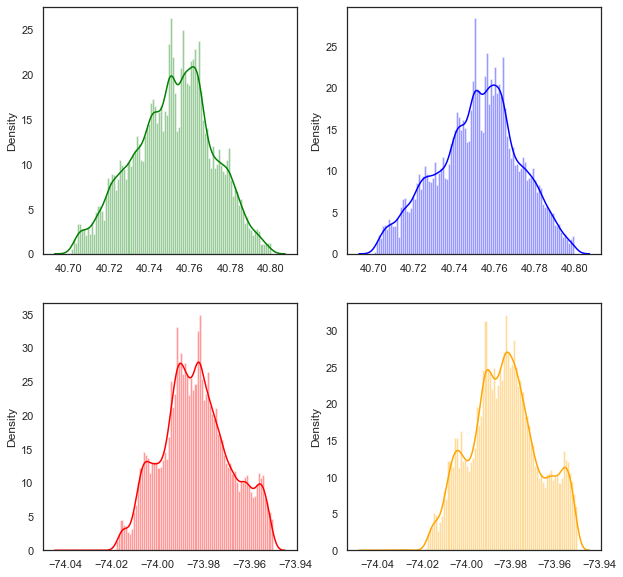

In [54]:
# Visualisation after removing outliers

sns.set(style="white", palette="muted")
f, axes = plt.subplots(2,2,figsize=(10, 10), sharex=False, sharey = False)
sns.distplot(data['pickup_latitude'].values, label = 'pickup_latitude',color="green",bins = 100, ax=axes[0, 0])
sns.distplot(data['pickup_longitude'].values, label = 'pickup_longitude',color="red",bins =100, ax=axes[1, 0])
sns.distplot(data['dropoff_latitude'].values, label = 'dropoff_latitude',color="blue",bins =100, ax=axes[0, 1])
sns.distplot(data['dropoff_longitude'].values, label = 'dropoff_longitude',color="orange",bins =100, ax=axes[1, 1])
plt.show()

Segregating variables: Independent and Dependent variables

In [55]:
x = data.drop(['log_trip_duration'], axis = 1)
y = data['log_trip_duration']

In [56]:
x.shape

(38172, 11)

In [57]:
y.shape

(38172,)

In [58]:
#Scaling the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

In [59]:
data.dtypes

passenger_count           int64
pickup_longitude        float64
pickup_latitude         float64
dropoff_longitude       float64
dropoff_latitude        float64
day_of_week               int64
hour_of_day               int64
log_trip_duration       float16
vendor_id_1               uint8
vendor_id_2               uint8
store_and_fwd_flag_N      uint8
store_and_fwd_flag_Y      uint8
dtype: object

In [60]:
x = pd.DataFrame(x_scaled, columns = x.columns)
x.head()

,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,day_of_week,hour_of_day,vendor_id_1,vendor_id_2,store_and_fwd_flag_N,store_and_fwd_flag_Y
0,0.166667,0.956176,0.788686,0.850698,0.712474,0.000000,0.695652,0.0,1.0,1.0,0.0
1,1.000000,0.869383,0.596891,0.927116,0.807234,0.166667,0.391304,0.0,1.0,1.0,0.0
2,0.166667,0.248505,0.083693,0.588907,0.406768,0.333333,0.260870,1.0,0.0,1.0,0.0
3,0.333333,0.511703,0.518431,0.510929,0.238866,1.000000,0.782609,0.0,1.0,1.0,0.0
4,0.166667,0.831198,0.588831,0.711422,0.641815,0.333333,0.869565,1.0,0.0,1.0,0.0


In [61]:
x.head()

,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,day_of_week,hour_of_day,vendor_id_1,vendor_id_2,store_and_fwd_flag_N,store_and_fwd_flag_Y
0,0.166667,0.956176,0.788686,0.850698,0.712474,0.000000,0.695652,0.0,1.0,1.0,0.0
1,1.000000,0.869383,0.596891,0.927116,0.807234,0.166667,0.391304,0.0,1.0,1.0,0.0
2,0.166667,0.248505,0.083693,0.588907,0.406768,0.333333,0.260870,1.0,0.0,1.0,0.0
3,0.333333,0.511703,0.518431,0.510929,0.238866,1.000000,0.782609,0.0,1.0,1.0,0.0
4,0.166667,0.831198,0.588831,0.711422,0.641815,0.333333,0.869565,1.0,0.0,1.0,0.0


In [62]:
# Importing the train test split function
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(x,y, random_state = 56)

In [63]:
#importing KNN regressor and metric mse

from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.metrics import mean_squared_error as mse

In [64]:
def Elbow(K):
  #initiating empty list
    test_mse = []
  
  #training model for evey value of K
    for i in K:
        #Instance of KNN
        reg = KNN(n_neighbors = i)
        reg.fit(train_x, train_y)
        #Appending mse value to empty list claculated using the predictions
        tmp = reg.predict(test_x)
        tmp = mse(tmp,test_y)
        test_mse.append(tmp)
    
    return test_mse

In [65]:
#Defining K range
k = range(1,201,10)
# calling above defined function
test_score = Elbow(k)
test_score

[0.3508,
 0.2062,
 0.2097,
 0.2155,
 0.2203,
 0.2244,
 0.2289,
 0.2335,
 0.2375,
 0.2415,
 0.245,
 0.2482,
 0.2515,
 0.2542,
 0.2568,
 0.2595,
 0.262,
 0.2644,
 0.2668,
 0.269]

Text(0.5, 1.0, 'Elbow Curve for test')

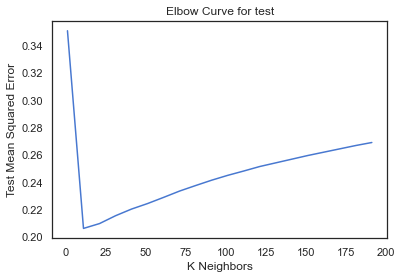

In [66]:
# plotting the Curves
plt.plot(k, test_score)
plt.xlabel('K Neighbors')
plt.ylabel('Test Mean Squared Error')
plt.title('Elbow Curve for test')

In [67]:
k = range(1,20)

In [68]:
test_score_2 = Elbow(k)

Text(0.5, 1.0, 'Elbow Curve for test_score_2')

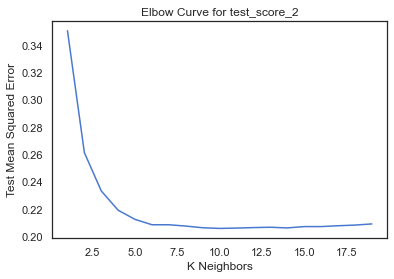

In [69]:
# plotting the Curves
plt.plot(k, test_score_2)
plt.xlabel('K Neighbors')
plt.ylabel('Test Mean Squared Error')
plt.title('Elbow Curve for test_score_2')

In [70]:
# Creating instance of KNN
reg = KNN(n_neighbors = 8)

# Fitting the model
reg.fit(train_x, train_y)

# Predicting over the Train Set and calculating K
train_predict = reg.predict(train_x)
k_train = mse(train_predict, train_y)
print('Train MSE    ', k_train )

# Predicting over the Test Set and calculating K
test_predict = reg.predict(test_x)
k_test = mse(test_predict, test_y)
print('Test MSE    ', k_test )

Train MSE     0.1545
Test MSE     0.2076


# 4. Linear Model

In [71]:
#we used he same cleaned dataset which we used for knn above
data.head()

,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,day_of_week,hour_of_day,log_trip_duration,vendor_id_1,vendor_id_2,store_and_fwd_flag_N,store_and_fwd_flag_Y
0,1,-73.953918,40.778873,-73.963875,40.771164,0,16,5.992188,0,1,1,0
3,6,-73.961670,40.759720,-73.956779,40.780628,1,9,7.039062,0,1,1,0
4,1,-74.017120,40.708469,-73.988182,40.740631,2,6,6.742188,1,0,1,0
5,2,-73.993614,40.751884,-73.995422,40.723862,6,18,7.285156,0,1,1,0
6,1,-73.965080,40.758915,-73.976807,40.764107,2,20,5.988281,1,0,1,0


Implementing Linear Regression

In [72]:
#Segregating depenent and independent variable
x = data.drop(['log_trip_duration'], axis = 1)
y = data['log_trip_duration']
x.shape, y.shape

((38172, 11), (38172,))

In [73]:
#train test split function
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(x,y, random_state = 42)

In [74]:
#importing Linear Regression and metric mean square error
from sklearn.linear_model import LinearRegression as LR
from sklearn.metrics import mean_absolute_error as mae

In [75]:
# Creating instance of Linear Regresssion
lr = LR()

# Fitting the model
lr.fit(train_x, train_y)

LinearRegression()

In [76]:
# Predicting over the Train Set and calculating error
train_predict = lr.predict(train_x)
k = mae(train_predict, train_y)
print('Trai Mean Absolute Error', k )

Trai Mean Absolute Error 0.5041721613913187


In [77]:
# Predicting over the Test Set and calculating error
test_predict = lr.predict(test_x)
k = mae(test_predict, test_y)
print('Test Mean Absolute Error    ', k )

Test Mean Absolute Error     0.5077077912924667


In [78]:
# parameters of linear regression
lr.coef_

array([ 4.40946989e-03, -1.23013368e+00, -5.76158631e-01,  2.99968487e-01,
       -2.73540674e+00, -1.24901229e-02,  5.38833776e-03, -1.21341651e-03,
        1.21341651e-03, -6.70403377e-02,  6.70403377e-02])

Text(0.5, 1.0, 'Coefficient plot')

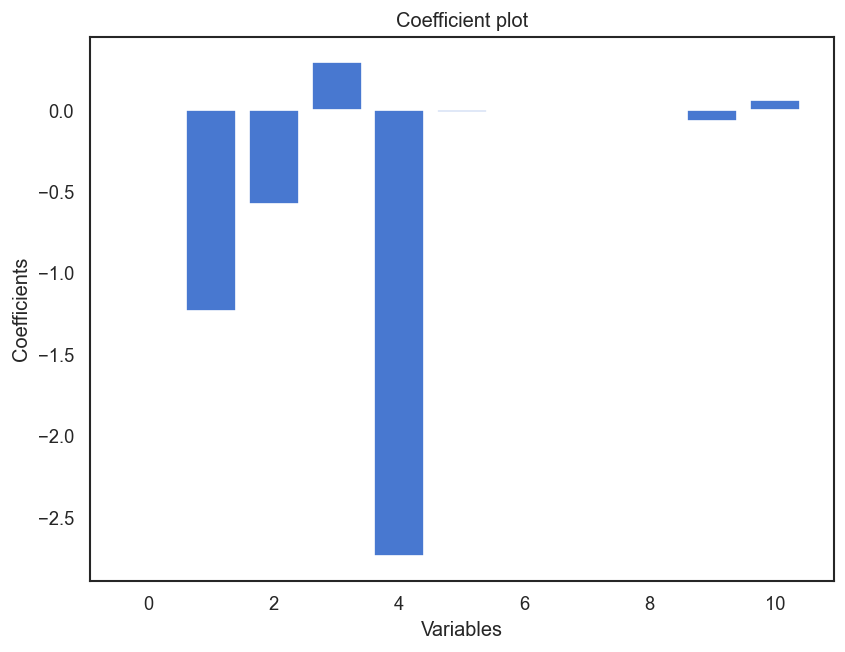

In [79]:
#Plotting coefficients
plt.figure(figsize=(8, 6), dpi=120, facecolor='w', edgecolor='blue')
x = range(len(train_x.columns))
y = lr.coef_
plt.bar( x, y )
plt.xlabel("Variables")
plt.ylabel('Coefficients')
plt.title('Coefficient plot')

In above plot we can see that model depends depends on few variable too much and few varibale values are close to zero.

# Linear regression with normalisation

Till now have simply been predicting the values using the linear regression, But in order to Interpret the model, the normalising of the data is essential.

In [80]:
# Creating instance of Linear Regresssion
lr = LR(normalize = True)

# Fitting the model
lr.fit(train_x, train_y)

LinearRegression(normalize=True)

In [81]:
# Predicting over the Train Set and calculating error
train_predict = lr.predict(train_x)
k_train = mae(train_predict, train_y)
print('Training Mean Absolute Error', k_train)

Training Mean Absolute Error 0.5041721613913182


In [82]:
# Predicting over the Test Set and calculating error
test_predict = lr.predict(test_x)
k_test = mae(test_predict, test_y)
print('Test Mean Absolute Error    ', k_test )

Test Mean Absolute Error     0.507707791292466


In [83]:
# Predicting over the Test Set and calculating error
test_predict = lr.predict(test_x)
k = mae(test_predict, test_y)
print('Test Mean Absolute Error    ', k )

Test Mean Absolute Error     0.507707791292466


Text(0.5, 1.0, 'Normalized Coefficient plot')

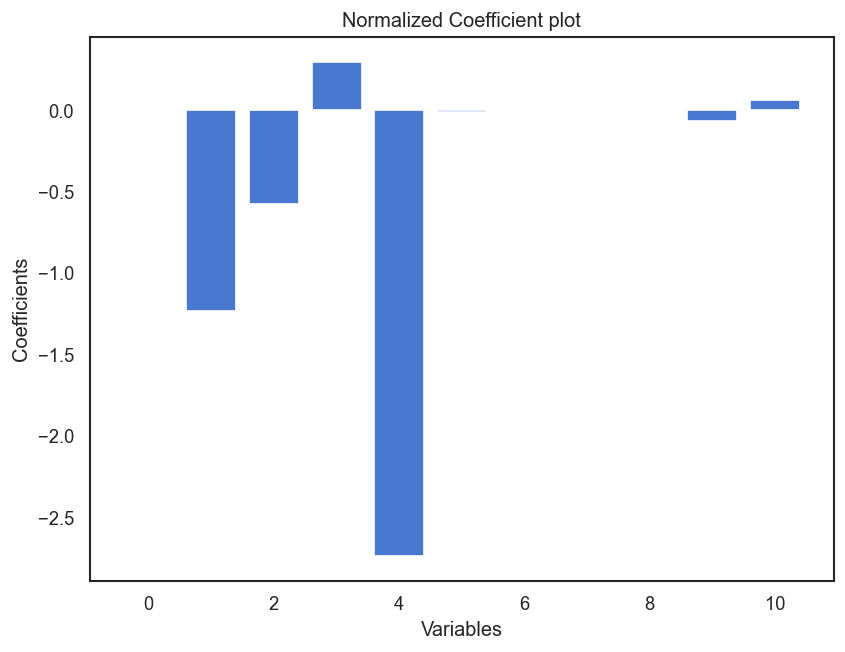

In [84]:
plt.figure(figsize=(8, 6), dpi=120, facecolor='w', edgecolor='b')
x = range(len(train_x.columns))
y = lr.coef_
plt.bar( x, y )
plt.xlabel( "Variables")
plt.ylabel('Coefficients')
plt.title('Normalized Coefficient plot')

Now the coefficients we see are normalised and we can easily make final inferences out of it.

Here we can see that there are a lot of Coefficients which are near to zero and not Significant. So these can be removed to buildup the model again as per requirement.


# Ridge regularisation

In [85]:
# Importing ridge from sklearn's linear_model module
from sklearn.linear_model import Ridge

In [86]:
# Setting the different values of alpha to be tested
alpha_ridge = [0, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20, 25]

In [87]:
train_error_ridge = []
test_error_ridge = []

for i in alpha_ridge:
    
    R = Ridge(alpha = i, normalize=True)
    R.fit(train_x, train_y)
    train_y_pred = R.predict(train_x)
    test_y_pred = R.predict(test_x)
    
    mrss_train = sum((train_y_pred-train_y)**2)/train_x.shape[0]
    mrss_test = sum((test_y_pred-test_y)**2)/test_x.shape[0]
    
    train_error_ridge.append(mrss_train)
    test_error_ridge.append(mrss_test)

In [88]:
R.coef_

array([ 1.56410227e-04, -1.05061360e-01, -8.87522845e-02, -9.89718860e-02,
       -1.14723895e-01, -4.39723972e-04,  2.10827190e-04, -1.12139039e-04,
        1.12139039e-04, -4.69885499e-03,  4.69885499e-03])

In [89]:
# Initializing the dataframe to store error

col = ['train_error_ridge','test_error_ridge']
ind = ['alpha_%.2g'%alpha_ridge[i] for i in range(0,10)]
matrix_ridge = pd.DataFrame(index=ind, columns=col)

In [90]:
matrix_ridge['train_error_ridge'] = train_error_ridge
matrix_ridge['test_error_ridge'] = test_error_ridge
matrix_ridge

,train_error_ridge,test_error_ridge
alpha_0,0.390693,0.393589
alpha_1e-08,0.390693,0.393589
alpha_0.0001,0.390693,0.393589
alpha_0.001,0.390693,0.393588
alpha_0.01,0.390694,0.393581
alpha_1,0.391838,0.394636
alpha_5,0.394339,0.397194
alpha_10,0.395403,0.398283
alpha_20,0.396169,0.399065
alpha_25,0.396349,0.399250


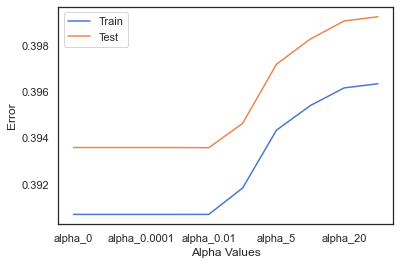

In [91]:
# Plotting the Alpha Values VS Error graph

matrix_ridge[['train_error_ridge','test_error_ridge']].plot()
plt.xlabel('Alpha Values')
plt.ylabel('Error')
plt.legend(['Train', 'Test'])
plt.show()

In [92]:
matrix_ridge.min()[0]

0.3906934589731223

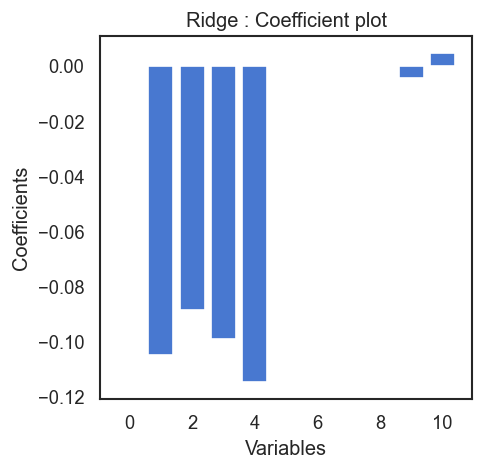

In [93]:
plt.figure(figsize=(4, 4), dpi=120, facecolor='w', edgecolor='b')
x = range(len(train_x.columns))
y = R.coef_
plt.bar( x, y )
plt.xlabel( "Variables")
plt.ylabel('Coefficients')
plt.title('Ridge : Coefficient plot')
plt.show()

# lasso

In [94]:
# Importing Lasso model from sklearn's linear_model module
from sklearn.linear_model import Lasso

In [95]:
# Definining the alpha values to test
alpha_lasso = [0, 1e-10, 1e-8, 1e-5,1e-4, 1e-3,1e-2, 1, 5, 10]

In [96]:
train_error_lasso = []
test_error_lasso = []

for i in alpha_lasso:
    
    L = Lasso(alpha = i, normalize=True)
    L.fit(train_x, train_y)
    train_y_pred = L.predict(train_x)
    test_y_pred = L.predict(test_x)
    
    mrss_train = sum((train_y_pred-train_y)**2)/train_x.shape[0]
    mrss_test = sum((test_y_pred-test_y)**2)/test_x.shape[0]
    
    train_error_lasso.append(mrss_train)
    test_error_lasso.append(mrss_test)

In [97]:
# Initializing the dataframe to store error

col = ['train_error_lasso','test_error_lasso']
ind = ['alpha_%.2g'%alpha_lasso[i] for i in range(0,10)]
matrix_lasso = pd.DataFrame(index=ind, columns=col)

In [98]:
matrix_lasso['train_error_lasso'] = train_error_lasso
matrix_lasso['test_error_lasso'] = test_error_lasso
matrix_lasso

,train_error_lasso,test_error_lasso
alpha_0,0.390693,0.393589
alpha_1e-10,0.390693,0.393589
alpha_1e-08,0.390693,0.393589
alpha_1e-05,0.390722,0.393586
alpha_0.0001,0.391837,0.394759
alpha_0.001,0.397190,0.400109
alpha_0.01,0.397190,0.400109
alpha_1,0.397190,0.400109
alpha_5,0.397190,0.400109
alpha_10,0.397190,0.400109


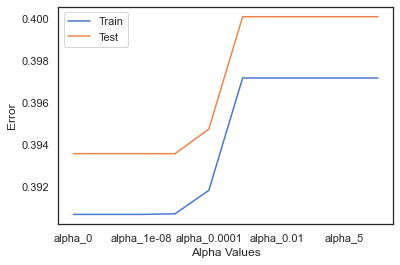

In [99]:
# Plotting the Alpha Values VS Error graph

matrix_lasso[['train_error_lasso','test_error_lasso']].plot()
plt.xlabel('Alpha Values')
plt.ylabel('Error')
plt.legend(['Train', 'Test'])
plt.show()

In [100]:
matrix_lasso.min()


train_error_lasso    0.390693
test_error_lasso     0.393586
dtype: float64

In [101]:
L.coef_

array([ 0., -0., -0., -0., -0., -0.,  0., -0.,  0., -0.,  0.])

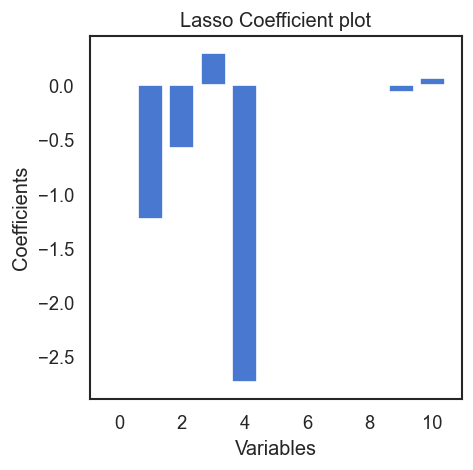

In [102]:
plt.figure(figsize=(4, 4), dpi=120, facecolor='w', edgecolor='b')
x = range(len(train_x.columns))
y = lr.coef_
plt.bar( x, y )
plt.xlabel( "Variables")
plt.ylabel('Coefficients')
plt.title('Lasso Coefficient plot')
plt.show()

The ridge and lasso regularisation 

# 5. Decision Tree

In [103]:
# Seperating independent and dependent variables

# Features
x = data.drop(['log_trip_duration'], axis=1)

# Target
y = data['log_trip_duration']

x.shape, y.shape

((38172, 11), (38172,))

In [104]:
# Importing the train test split function
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(x,y, random_state=42, test_size = 0.25) 

In [105]:
# Importing decision tree regressor
from sklearn.tree import DecisionTreeRegressor

In [106]:
# Creating the decision tree function
dt_model = DecisionTreeRegressor(random_state=10)

In [107]:
# Fitting the model
dt_model.fit(train_x, train_y)

DecisionTreeRegressor(random_state=10)

In [108]:
# Checking the training score
dt_model.score(train_x, train_y)

1.0

In [109]:
# Checking the test score
dt_model.score(test_x, test_y)

0.2163896924555183

In [110]:
# Predictions on test set
y_pred = dt_model.predict(test_x)

In [111]:
train_accuracy = []
test_accuracy = []
for depth in range(1,30):
    dt_model = DecisionTreeRegressor(max_depth=depth, random_state=10)
    dt_model.fit(train_x, train_y)
    train_accuracy.append(dt_model.score(train_x, train_y))
    test_accuracy.append(dt_model.score(test_x, test_y))

In [112]:
frame = pd.DataFrame({'max_depth':range(1,30), 'train_acc':train_accuracy, 'test_acc':test_accuracy})
frame

,max_depth,train_acc,test_acc
0,1,0.021137,0.022694
1,2,0.039416,0.042702
2,3,0.110589,0.104407
3,4,0.139781,0.127026
4,5,0.157472,0.139209
5,6,0.243240,0.225359
6,7,0.281064,0.254503
7,8,0.322277,0.281239
8,9,0.389060,0.318376
9,10,0.436579,0.345877


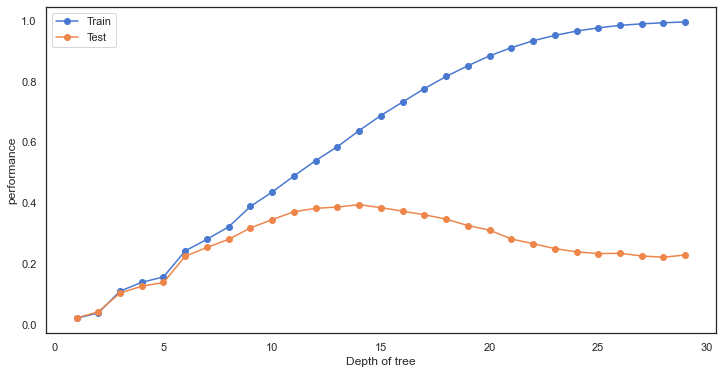

In [113]:
plt.figure(figsize=(12,6))
plt.plot(frame['max_depth'], frame['train_acc'], marker='o')
plt.plot(frame['max_depth'], frame['test_acc'], marker='o')
plt.xlabel('Depth of tree')
plt.ylabel('performance')
plt.legend(['Train', 'Test'])
plt.show()

In [114]:
dt_model = DecisionTreeRegressor(max_depth=18, max_leaf_nodes=80, random_state =10)

In [115]:
# Fitting the model
dt_model.fit(train_x, train_y)

DecisionTreeRegressor(max_depth=18, max_leaf_nodes=80, random_state=10)

In [116]:
# Training score
dt_model.score(train_x, train_y)

0.37788496556483675

In [117]:
# Test score
dt_model.score(test_x, test_y)

0.35484200710114755

In [118]:
from sklearn import tree

In [119]:
decision_tree = tree.export_graphviz(dt_model,out_file='tree.dot',feature_names=train_x.columns,max_depth=2,filled=True)

In [120]:
!dot -Tpng tree.dot -o tree.png

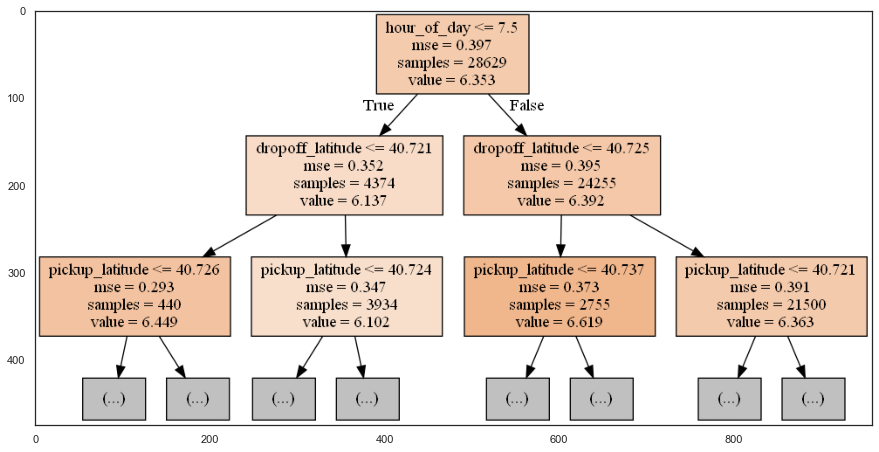

In [121]:
image = plt.imread('tree.png')
plt.figure(figsize=(15, 40))
plt.imshow(image)
plt.show()

# 6. Plot Graphs

In [122]:
# Collecting scores from the models and assigning the value to the varibales
# multiply all values by 100 to get the better visualisation
# KNN
a = (1 - k_train)*100
b = (1 - k_test)*100

# Linear Regression
c = (1 - k_train)*100
d = (1 - k_test)*100

# Ridge Regression
e = (1 - matrix_ridge.min()[0])*100
f = (1 - matrix_ridge.min()[1])*100

# Lasso Regression
g = (1 - matrix_lasso.min()[0])*100
h = (1 - matrix_lasso.min()[1])*100

# Decision Tree
i = (dt_model.score(train_x, train_y))*100
j = (dt_model.score(test_x, test_y))*100

# Train error Bar plot

In [123]:
train_error_name = ['KNN',
                   'Linear Regression',
                   'Ridge',
                   'Lasso',
                   'Decision Tree']
score_train = [a, c, e, g, i]

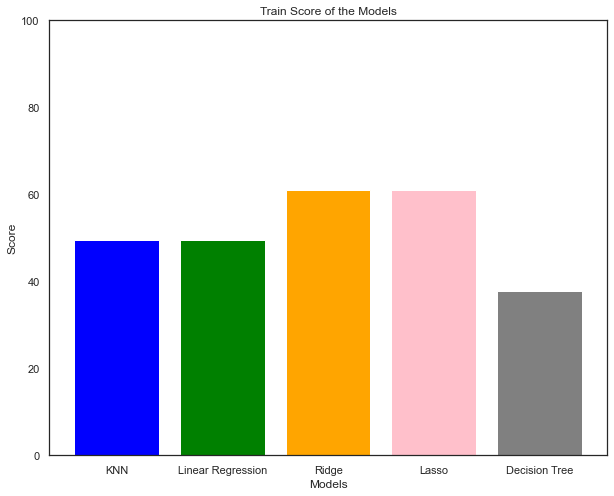

In [124]:
plt.figure(figsize = (10, 8))
plt.ylim(0, 100)
plt.bar(train_error_name, score_train, color=['blue', 'green', 'orange', 'pink', 'grey'])
plt.xlabel('Models')
plt.ylabel('Score')
plt.title('Train Score of the Models');

# Test error Bar plot

In [125]:
test_error_name = ['KNN',
                   'Linear Regression',
                   'Ridge',
                   'Lasso',
                   'Decision Tree']
score_test = [b, d, f, h, j]

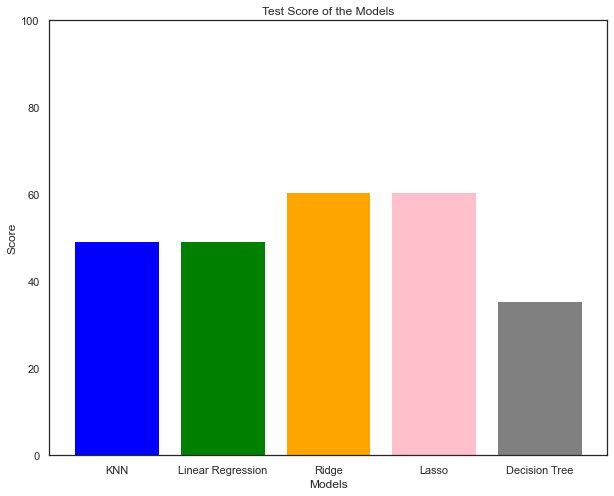

In [126]:
plt.figure(figsize = (10, 8))
plt.ylim(0, 100)
plt.bar(test_error_name, score_test, color=['blue', 'green', 'orange', 'pink', 'grey'])
plt.xlabel('Models')
plt.ylabel('Score')
plt.title('Test Score of the Models');